# # Author : BADAR IFTIKHAR
### LETSGROWMORE  
### LGM VIP JANUARY-2022
### BEGINNER LEVEL TASK 1
### TASK 3 PROJECT :
### Music Recommendation System

### Music Recommendation System

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

In [ ]:
df1 = pd.read_csv("/content/songs.csv")
df1.head()

In [ ]:
df2 = pd.read_csv("/content/users.csv")
df2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


### Pre-processing the Data

In [ ]:
df1["year"] = df1["year"].astype('Int64')
df1.rename(columns={"song_id": "SongID", "title": "Title", "release": "Album", "artist_name": "Artist", "year": "Year"}, inplace=True)
df1.head()

,SongID,Title,Album,Artist,Year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
df2["listen_count"] = df2["listen_count"].astype('Int64')
df2.rename(columns={"user_id": "UserID", "song_id": "SongID", "listen_count": "Listen Count"}, inplace=True)
df2.head()

,UserID,SongID,Listen Count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


### Creating the final dataset

In [ ]:
df = pd.merge(df2, df1.drop_duplicates(["SongID"]), on='SongID', how='left')
df['Song'] = df['Title'] + ' by ' + df['Artist']
df = df.drop(['Title'], axis=1)
df = df.head(50000)
df.head()

,UserID,SongID,Listen Count,Album,Artist,Year,Song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,Thicker Than Water,Jack Johnson,0,The Cove by Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas by Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Graduation,Kanye West,2007,Stronger by Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,In Between Dreams,Jack Johnson,2005,Constellations by Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly by Foo Fighters


### Analysing the data

### No of Songs by Year

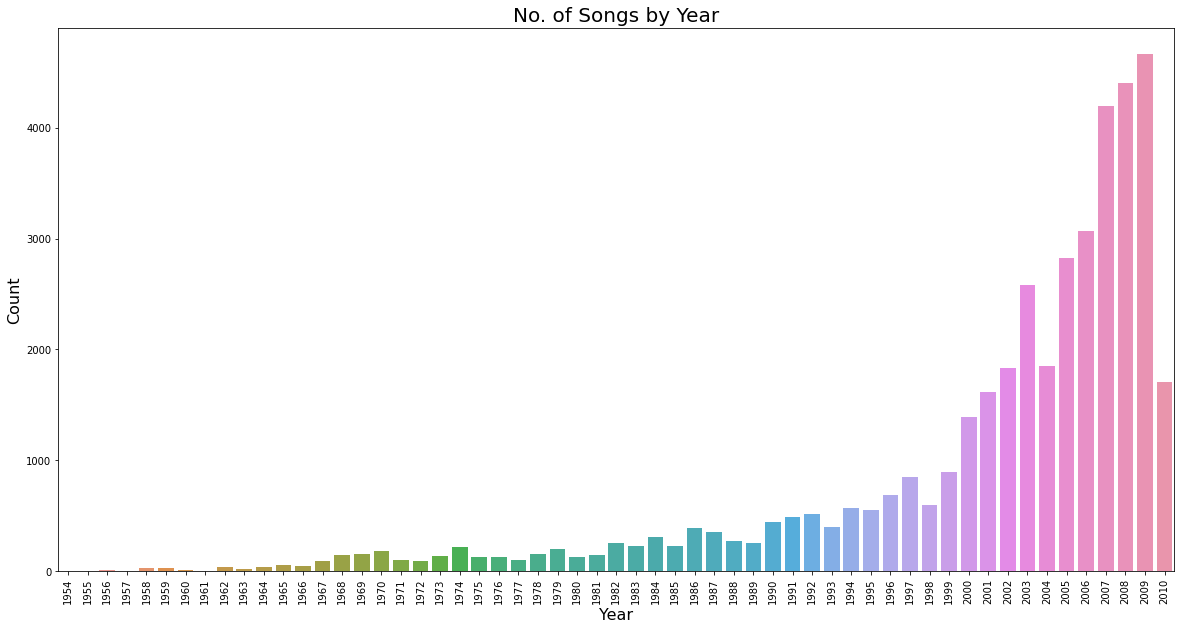

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=df[-(df['Year']==0)])
plt.xticks(rotation=90)
plt.title("No. of Songs by Year", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### No of Songs by Artist

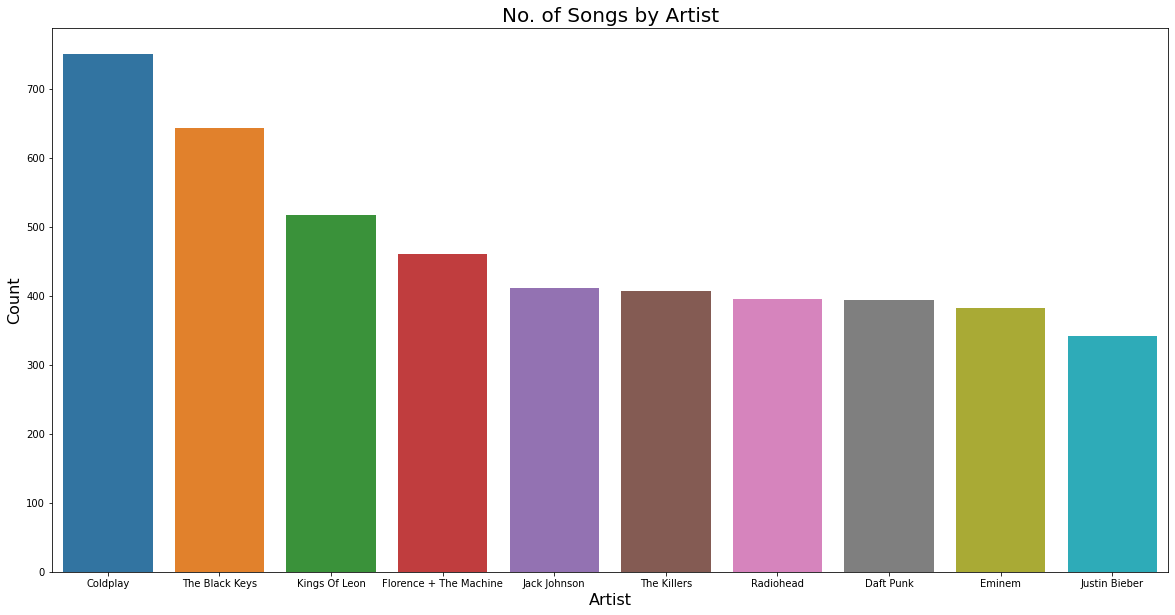

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['Artist'].value_counts()[:10].index,df['Artist'].value_counts()[:10].values)
plt.title('No. of Songs by Artist', fontsize=20)
plt.xlabel('Artist', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

### Most Popular Songs

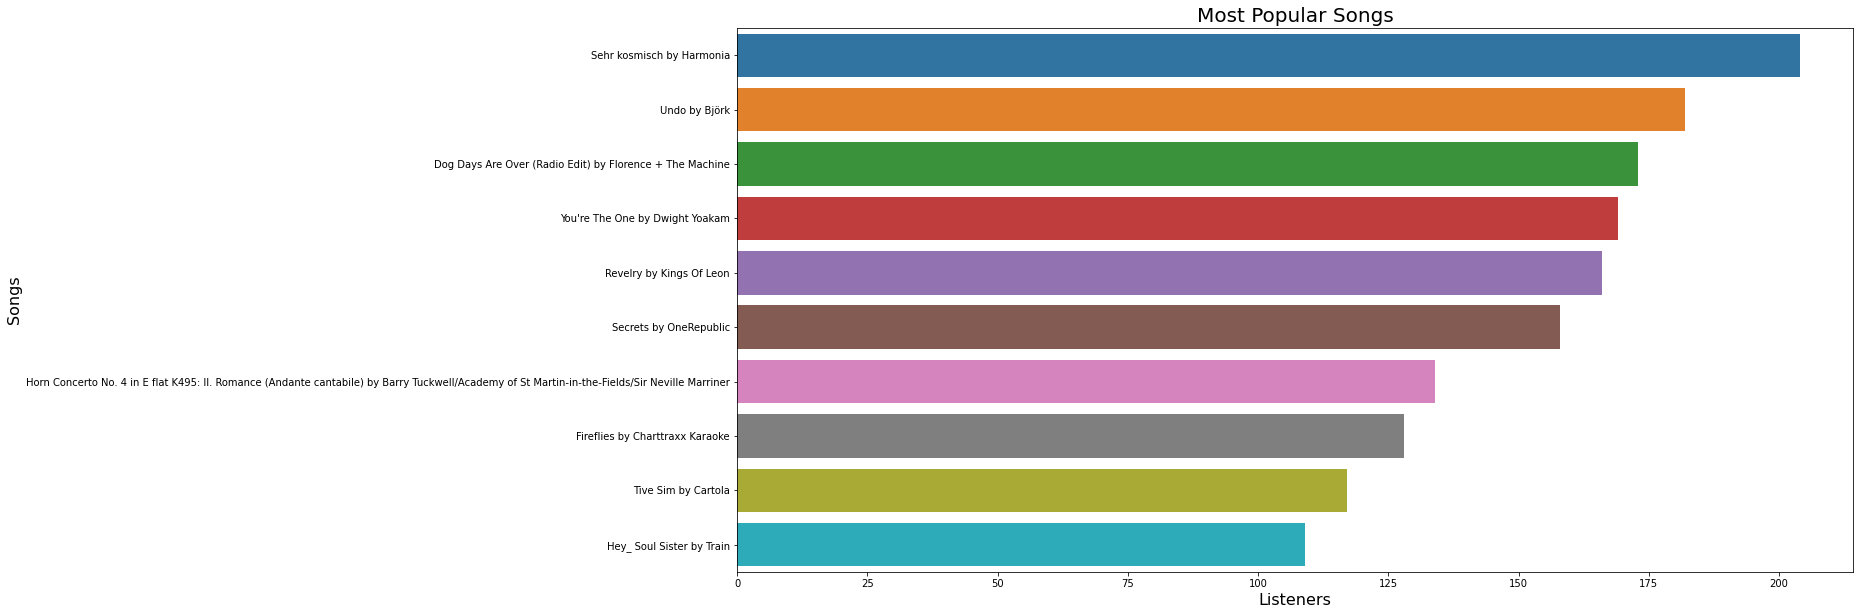

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['Song'].value_counts()[:10].values, df['Song'].value_counts()[:10].index)
plt.title('Most Popular Songs', fontsize=20)
plt.xlabel('Listeners', fontsize=16)
plt.ylabel('Songs', fontsize=16)
plt.show()

### Building the Recommendation Engine

In [ ]:

class Recommender():
    def __init__(self, data, user_id, song):
        self.data = data
        self.user_id = user_id
        self.song = song
        self.glcm = None
        
    def get_song_history(self, user):
        user_data = self.data[self.data[self.user_id] == user]
        return list(user_data[self.song].unique())
        
    def get_users(self, item):
        item_data = self.data[self.data[self.song] == item]
        return set(item_data[self.user_id].unique())
        
    def get_all_songs(self):
        return list(self.data[self.song].unique())
    def get_glcm(self, user_songs, all_songs):
        users = []        
        for i in range(0, len(user_songs)):
            users.append(self.get_users(user_songs[i]))   
        glcm = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        for i in range(0,len(all_songs)):
            songs_i_data = self.data[self.data[self.song] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):           
                users_j = users[j]
                users_intersection = users_i.intersection(users_j)
               
                users_union = users_i.union(users_j)
                glcm[j,i] = float(len(users_intersection))/float(len(users_union))

        return glcm

    def generate_recommendations(self, user, glcm, all_songs, user_songs):
        sim_scores = glcm.sum(axis=0)/float(glcm.shape[0])
        sim_scores = np.array(sim_scores)[0].tolist()
 
        sort_index = sorted(((e,i) for i,e in enumerate(list(sim_scores))), reverse=True)
        columns = ['UserID', 'Song', 'Score', 'Rank']
        df = pd.DataFrame(columns=columns)
         
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        print("Music Recommendations: \n")
        return df.drop(['UserID'], axis=1)
    def get_recommendations(self, user):
        user_songs = self.get_song_history(user)    
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations(user, glcm, all_songs, user_songs)

    def get_similar_songs(self, item_list):
        user_songs = item_list
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations("", glcm, all_songs, user_songs)
    

### Getting specific user's song history

In [ ]:
rec = Recommender(df, 'UserID', 'Song')
song_history = rec.get_song_history(df['UserID'][9999])

### User Song History

In [ ]:
print("User Song History: \n")
for song in song_history:
  print(song)

User Song History: 

Show Me How To Live by Audioslave
Billy Liar by The Decemberists
The Bachelor and the Bride by The Decemberists
Red Right Ankle by The Decemberists
Song for Myla Goldberg by The Decemberists
The Gymnast_ High Above the Ground by The Decemberists
Molly by Los Pericos
Let Me Take You There by Plain White T's


### Getting music recommendations for specific user

In [ ]:
rec.get_recommendations(df['UserID'][9999])

Music Recommendations: 



,Song,Score,Rank
0,As I Rise by The Decemberists,0.154679,1
1,Gimme Sympathy by Metric,0.117432,2
2,Oh Lately It's So Quiet by Ok Go,0.105962,3
3,The Soldiering Life by The Decemberists,0.096795,4
4,She's Got You High by Mumm-Ra,0.096416,5
5,Can't Go Back Now by The Weepies,0.089992,6
6,Satellite Mind by Metric,0.086525,7
7,Demon Days by Gorillaz,0.083715,8
8,The Devil Never Sleeps (Album) by Iron And Wine,0.083578,9
9,I Was Meant For the Stage by The Decemberists,0.083578,10


### Getting recommendations similar to specific songs

In [ ]:
rec.get_similar_songs(['Learn To Fly by Foo Fighters'])

Music Recommendations: 



,Song,Score,Rank
0,Generator by Foo Fighters,0.185185,1
1,Tired Of You by Foo Fighters,0.160000,2
2,Everlong by Foo Fighters,0.159091,3
3,Stacked Actors by Foo Fighters,0.142857,4
4,Karma Police by Radiohead,0.125000,5
5,Drops Of Jupiter by Train,0.125000,6
6,Breakout by Foo Fighters,0.120000,7
7,Don't Panic by Coldplay,0.116279,8
8,Low by Foo Fighters,0.115385,9
9,The Middle by Jimmy Eat World,0.115385,10
